<a href="https://colab.research.google.com/github/RF-Lab/lab_sources/blob/master/tf_classifier1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0-rc3


In [0]:
N         = 2000
mu1       = np.array([ [-3], [1] ])
mu2       = np.array([ [1], [-3] ])
sigma1    = np.array([ [1, 0.5], [0.5, 1] ])
sigma2    = np.array([ [1, -0.7], [-0.7, 1] ])
invSigma1 = np.linalg.inv(sigma1) 
invSigma2 = np.linalg.inv(sigma2) 
detSigma1 = np.log(np.linalg.det(sigma1))
detSigma2 = np.log(np.linalg.det(sigma2))

s1     = np.linalg.cholesky( sigma1 )
s2     = np.linalg.cholesky( sigma2 )


#print(np.shape(mu1))
vmu1         = np.tile(mu1,(1,N))
#print(np.shape(mu1))
x1           = s1 @ np.random.randn(2,N) + vmu1

vmu2         = np.tile(mu2,(1,N))
x2           = s2 @ np.random.randn(2,N) + vmu2

train_data   = np.column_stack((x1,x2)).transpose()
train_labels = np.column_stack((np.zeros((1,N+5000)),np.ones((1,N-5000)))).transpose()
print(np.shape(train_data))
print(np.shape(train_labels))


(40000, 2)
(40000, 1)


In [0]:
model = keras.Sequential([
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_data, train_labels, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 40000 samples
Epoch 1/5
40000/40000 [==============================] - 5s 114us/sample - loss: 0.2960 - acc: 0.8725
Epoch 2/5
40000/40000 [==============================] - 4s 97us/sample - loss: 0.2860 - acc: 0.8734
Epoch 3/5
20192/40000 [==============>...............] - ETA: 1s - loss: 0.2865 - acc: 0.8720

In [0]:
N         = 5000


#print(np.shape(mu1))
vmu1         = np.tile(mu1,(1,N))
#print(np.shape(mu1))
x1           = s1 @ np.random.randn(2,N) + vmu1

vmu2         = np.tile(mu2,(1,N))
x2           = s2 @ np.random.randn(2,N) + vmu2

test_data   = np.column_stack((x1,x2)).transpose()
test_labels = np.column_stack((np.zeros((1,N)),np.ones((1,N)))).transpose()
print(np.shape(train_data))
print(np.shape(train_labels))


(40000, 2)
(40000, 1)


In [0]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.1637 - acc: 0.9965

Test accuracy: 0.9965


(20000, 2)


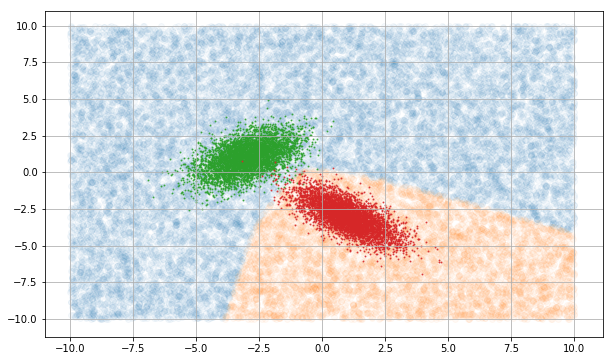

In [0]:
N = 20000
rand_x = np.random.rand(N,2)*20 -10

predictions = model.predict(rand_x)
print(np.shape(predictions))

plt.figure(figsize=[10,6])

plt.scatter( rand_x[predictions[:,0]>predictions[:,1],0 ], rand_x[predictions[:,0]>predictions[:,1],1 ], alpha=0.04 )
plt.scatter( rand_x[predictions[:,0]<predictions[:,1],0 ], rand_x[predictions[:,0]<predictions[:,1],1 ], alpha=0.04 )

plt.scatter( x1[0], x1[1], s=1, alpha=0.75  )
plt.scatter( x2[0], x2[1], s=1, alpha=0.75 )

plt.grid(True)